# Solve N-Queens problem and plot it on a N-dimension Chess board

## Import All Libraries needed

In [26]:
import string
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random

## Pre-define functions

### Generate dictionary for chess notations

In [27]:
def generate_dict(n):
    # Generaete dictionary for chess notations
    return {letter: idx for idx, letter in enumerate(string.ascii_lowercase[:n])}

### Plot Chessboard with Queens using Matplotlib

In [28]:
def plot_chessboard_with_queens(
        n = 8, # Number of squares to be solved for
        queens_positions = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7)], # Array with positions of queens to be placed at 
        queen_image_path = None # File path for the image to be used instead of Q
        ):
    
    # Create a chessboard (alternating colors)
    chessboard = np.zeros((n, n))
    chessboard[1::2, ::2] = 1  # Fill alternate rows starting from 1st row
    chessboard[::2, 1::2] = 1  # Fill alternate rows starting from 2nd row

    chess_grid = generate_dict(n) # Generate the chess notation dictionary

    # Plot the chessboard first
    plt.imshow(chessboard, cmap="gray", interpolation="none")
    plt.xticks(ticks=range(n), labels=[i for i in chess_grid.keys()][:n])  # Set custom x-tick labels, get the column notation
    plt.yticks(ticks=range(n), labels=[i + 1 for i in chess_grid.values()][:n])  # Set custom y-tick labels, get the row notation and add 1 to the index values
    
    for pos in queens_positions: # iterate through positions
        row, col = pos
        if queen_image_path: # If a path has been passed, use that image else, use Q            
            # Load the queen image (ensure it's transparent)
            queen_image = mpimg.imread(queen_image_path)
            plt.imshow(queen_image, extent=(col-0.5, col+0.5, row-0.5, row+0.5), alpha=1)
        else:
            plt.text(col, row, 'Q', ha='center', va='center', fontsize=20, color='Blue')

    # Set axis limits, ticks, and labels
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.gca().set_xticks(np.arange(-.5, n, 1), minor=True)
    plt.gca().set_yticks(np.arange(-.5, n, 1), minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=2)

    # Show the chessboard with queens
    plt.show()

### Define N-Queens solver class

In [48]:
class NQueens:
    def __init__(self, n, image_path=None, initial_position=[]):
        self.n = n
        self.board = np.array([["*" for _ in range(n)] for _ in range(n)])
        self.queen_positions = []
        self.rows = set()
        self.cols = set()
        self.diag1 = set()
        self.diag2 = set()
        self.dictionary_alphabets = generate_dict(n)
        self.image_path = image_path

        # Normalize input: convert matrix → list of (x, y)
        if initial_position and isinstance(initial_position[0], list):
            coords = []
            for i in range(n):
                for j in range(n):
                    if initial_position[i][j] == "Q":
                        coords.append((i, j))
            self.initial_position = coords
        else:
            self.initial_position = initial_position

        # Place initial queens safely
        for (x, y) in self.initial_position:
            if not self.is_safe(x, y):
                self.print_board()
                raise ValueError(f"Invalid position provided. Cannot place queen at ({x}, {y}).")
            self.put_queen(x, y)


    def is_safe(self, x, y): # Check if placing a queen at (x, y) is safe.
        return (x not in self.rows) and (y not in self.cols) and (x + y not in self.diag1) and (x - y not in self.diag2)

    def put_queen(self, x, y): # Place a queen on the board and mark the row, column, and diagonals as unavailable
        self.board[x][y] = 'Q' # Put a Q for queen
        self.queen_positions.append((x, y))  # Add the latest move to the positions list
        self.rows.add(x) # Add the latest row to block the entire row
        self.cols.add(y) # Add the latest column to block the entire row
        self.diag1.add(x + y) # Add it to the list of major diagonals
        self.diag2.add(x - y) # Add it to the list of minor diagonals
        square = f"{[key for key, item in self.dictionary_alphabets.items() if item == y][0]}{x+1}" # Get the square notation
        print(f"Put queen on {square}")

    def remove_queen(self): # Remove the last placed queen and unblock its row, column, and diagonals. This is used when we backtrack due to unsolvable position
        if not self.queen_positions:
            return
        x, y = self.queen_positions.pop()  # Remove the last added item from the list, pop is used to remove the last added item in the list
        self.board[x][y] = '*' # Remove the Q from the last added square
        self.rows.remove(x) # Remove the latest row to unblock the entire row blocked because of the move made
        self.cols.remove(y) # Remove the latest column to unblock the entire column blocked because of the move made
        self.diag1.remove(x + y) # Remove the latest major diagonal list to unblock the diagonal blocked because of the move made
        self.diag2.remove(x - y) # Remove the latest minor diagonal list to unblock the diagonal blocked because of the move made

    def solve(self): # Solve the NQueens problem with random queen placement and backtracking
        if self.initial_position:
            print("Initial Board")
            self.print_board()

        if self.backtrack(0):  # Start solving from the first column, the code currently works column wise so have to start with the first column
            print("Solution found")
            self.print_board()
        else:
            print("No solution found.")


    def backtrack(self, col): # Backtracking approach to place queens. Try placing a queen in each row of the current column
        if col >= self.n:
            print("All queens are placed")
            return True
        if col in self.cols:  # already has a queen
            return self.backtrack(col + 1)

        available_rows = list(range(self.n))
        random.shuffle(available_rows)  # Randomize row selection for variety

        for row in available_rows:
            if self.is_safe(row, col):
                self.put_queen(row, col) # Place the queen if it's safe

                if self.backtrack(col + 1): # Move to the next column
                    return True

                self.remove_queen() # If placing the queen here doesn't lead to a solution, backtrack

        # If no position in this column works, return False to trigger backtracking. Now it will randomly select another row in the previosu column and fix it
        return False

    def print_board(self): # Print the current state of the board
        plot_chessboard_with_queens(self.n, self.queen_positions, self.image_path)


## Model Config

In [30]:
n = 8  # size of chessboard (can be any number)
queen_image_path = "queen.png"  # Path to your queen image

## Results

Put queen on a7
Put queen on b5
Put queen on c3
Put queen on d8
Put queen on e6
Put queen on f4
Put queen on g2
Put queen on e4
Put queen on d1
Put queen on e6
Put queen on f8
Put queen on g2
Put queen on h4
All queens are placed
Solution found


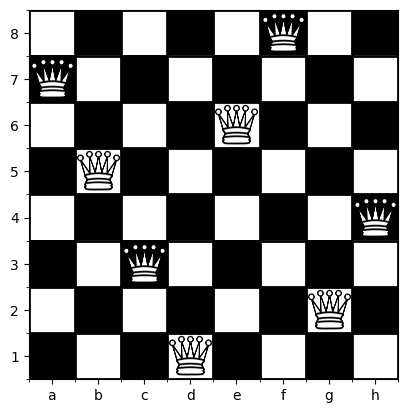

In [31]:
nqueens = NQueens(n, image_path=queen_image_path) # Assigns a variable to the model
nqueens.solve()

Put queen on b1
Put queen on h4
Initial Board


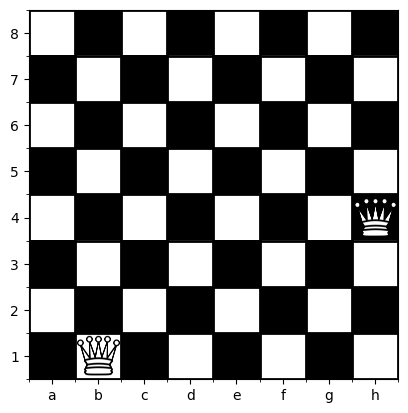

Put queen on a7
Put queen on c6
Put queen on d2
Put queen on e5
Put queen on f8
Put queen on c3
Put queen on d6
Put queen on e2
Put queen on e8
Put queen on d5
Put queen on e2
Put queen on f8
Put queen on e8
Put queen on c8
Put queen on d2
Put queen on e5
Put queen on f3
Put queen on d6
Put queen on e2
Put queen on d5
Put queen on e2
Put queen on a8
Put queen on c3
Put queen on d6
Put queen on e2
Put queen on f7
Put queen on d7
Put queen on e2
Put queen on c5
Put queen on d2
Put queen on e6
Put queen on d7
Put queen on e2
Put queen on c7
Put queen on d2
Put queen on e6
Put queen on a6
Put queen on c5
Put queen on d2
Put queen on e8
Put queen on f3
Put queen on g7
All queens are placed
Solution found


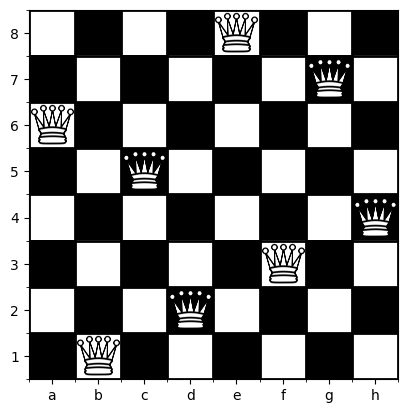

In [52]:
n = 8  # size of chessboard (can be any number)
nqueens_with_initial_position = NQueens(n, 
                  image_path=queen_image_path, 
                  initial_position=[(0,1), (3,7)]) # Assigns a variable to the model
nqueens_with_initial_position.solve()